In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt
from Bio import SeqIO, Phylo

# Collate Data from Bactopia and Poppunk Analyses

In [2]:
metadata = pd.read_csv('20240122_invasive_gas_metadata_Jan23.csv', sep='\t').set_index('Sample')

emmtype = pd.read_csv('results/emmtyper_results.tsv', sep='\t', names=['Sample', 'Number of Clusters',
                                                               'Predicted emm-type', 'Possible emm-like alleles',
                                                              'EMM cluster'])
emmtype['Sample'] = emmtype['Sample'].str.split('_').str.get(0)
emmtype = emmtype[['Sample', 'Predicted emm-type', 'EMM cluster', 'Possible emm-like alleles']].set_index('Sample')

mlst = pd.read_csv('results/mlst_results.tsv', sep='\t', names=['Sample', 'Scheme', "MLST", "Allele1", "Allele2", "Allele3",
                                                       "Allele4", "Allele5", "Allele6", "Allele7"])
mlst['Sample'] = mlst['Sample'].str.split('_').str.get(0)
mlst = mlst[['Sample', 'MLST']].set_index("Sample")

poppunk = pd.read_csv('poppunk/poppunk_clusters/poppunk_clusters_clusters.csv')
poppunk['Sample'] = poppunk['Taxon'].str.split('_').str.get(0)
poppunk = poppunk.rename(columns={'Cluster': 'Poppunk_Cluster', 'Taxon': 'Genome_Name'}).set_index("Sample")
metadata = pd.concat([metadata, mlst, emmtype, poppunk], axis=1).reset_index()
metadata = metadata[~metadata['Genome_Name'].isna()]

metadata = metadata.sort_values('Invasive', ascending=False)
metadata['Invasive'] = metadata['Invasive'].replace({'invasive': 'Invasive', 'non-invasive': 'Non-invasive'})
metadata[['Genome_Name', 'Invasive', 'MLST', 'EMM cluster', 'Predicted emm-type', 'Poppunk_Cluster']].rename(columns={'Genome_Name': 'ID'})

metadata.to_csv('metadata.csv', sep='\t', index=False)

## Compare invasiveness vs specific clades

In [3]:
invasive = metadata[metadata['Invasive'] == 'Invasive']
invasive_num = invasive['Predicted emm-type'].value_counts()
invasive_num.name = 'Invasive (n)'
invasive_perc = invasive_num / invasive_num.sum() * 100
invasive_perc.name = 'Invasive (% of all invasive isolates)'
invasive = pd.concat([invasive_num, invasive_perc], axis=1)

num_invasive = metadata.groupby('Predicted emm-type')['Invasive'].value_counts() 
perc_invasive = num_invasive / metadata.groupby('Predicted emm-type').size() * 100
num_invasive = num_invasive.reset_index(name='n')
perc_invasive = perc_invasive.reset_index(name='%')

invasive['Invasive (% of isolates of that emm-type)'] = perc_invasive[perc_invasive['Invasive'] == 'invasive'].set_index('Predicted emm-type')['%']
invasive

,Invasive (n),Invasive (% of all invasive isolates),Invasive (% of isolates of that emm-type)
EMM49.0,9,19.148936,NaN
EMM1.0,6,12.765957,NaN
EMM12.0,5,10.638298,NaN
EMM1.3,4,8.510638,NaN
EMM12.8,2,4.255319,NaN
EMM12.7,2,4.255319,NaN
EMM92.0,2,4.255319,NaN
EMM83.1,2,4.255319,NaN
EMM53.0~,2,4.255319,NaN
EMM12.37,2,4.255319,NaN


In [4]:
invasive = metadata[metadata['Invasive'] == 'Invasive']
invasive_num = invasive['Poppunk_Cluster'].value_counts()
invasive_num.name = 'Invasive (n)'
invasive_perc = invasive_num / invasive_num.sum() * 100
invasive_perc.name = 'Invasive (% of all invasive isolates)'
invasive = pd.concat([invasive_num, invasive_perc], axis=1)

num_invasive = metadata.groupby('Poppunk_Cluster')['Invasive'].value_counts() 
perc_invasive = num_invasive / metadata.groupby('Poppunk_Cluster').size() * 100
num_invasive = num_invasive.reset_index(name='n')
perc_invasive = perc_invasive.reset_index(name='%')

invasive['Invasive (% of isolates of that Poppunk_Cluster)'] = perc_invasive[perc_invasive['Invasive'] == 'invasive'].set_index('Poppunk_Cluster')['%']
invasive

,Invasive (n),Invasive (% of all invasive isolates),Invasive (% of isolates of that Poppunk_Cluster)
1,11,23.404255,NaN
2,10,21.276596,NaN
16,9,19.148936,NaN
27,3,6.382979,NaN
37,2,4.255319,NaN
24,2,4.255319,NaN
127,1,2.127660,NaN
11,1,2.127660,NaN
10,1,2.127660,NaN
4,1,2.127660,NaN


## Tally presence and absence of curated virulence/adhesion factors

In [5]:
virulence = pd.read_excel('virulence_adhesion_factors/Group A Strep Virulence Factor List for WGS.xlsx')
virulence2 = pd.read_excel('virulence_adhesion_factors/Additional GAS genes.xlsx')
virulence = pd.concat([virulence, virulence2])

all_vfs = virulence['Gene Name'].unique()
all_ids = metadata['Genome_Name'].dropna().unique()
with open('virulence_adhesion_factors/virulence_factors.fas', 'w') as fh:
    for _, row in virulence[['Gene Name', 'DNA Sequence']].iterrows():
        fh.write(f">{row['Gene Name']}\n{row['DNA Sequence']}\n")

vf_hits = []
for out6 in Path('virulence_adhesion_factors/vf_hits/').glob('*.out6'):
    genome = out6.name.replace('.out6', '')
    out6 = pd.read_csv(out6, names="qaccver saccver pident length mismatch gapopen qstart qend sstart send evalue bitscore qcovs qcovhsp qcovus".split(), sep='\t')
    out6['ID'] = genome
    vf_hits.append(out6)
vf_hits = pd.concat(vf_hits)
vf_hits = vf_hits[(vf_hits['pident'] > 80) & (vf_hits['qcovus'] > 80)]
vf_hits_presence_absence_matrix = pd.crosstab(vf_hits['ID'], vf_hits['saccver'])
vf_hits_presence_absence_matrix[vf_hits_presence_absence_matrix > 1] = 1

vf_hits = vf_hits.set_index('ID')
vf_hits['Invasive'] = metadata.set_index('Genome_Name')['Invasive']
vf_hits['Predicted emm-type'] = metadata.set_index('Genome_Name')['Predicted emm-type']
vf_hits = vf_hits.reset_index()

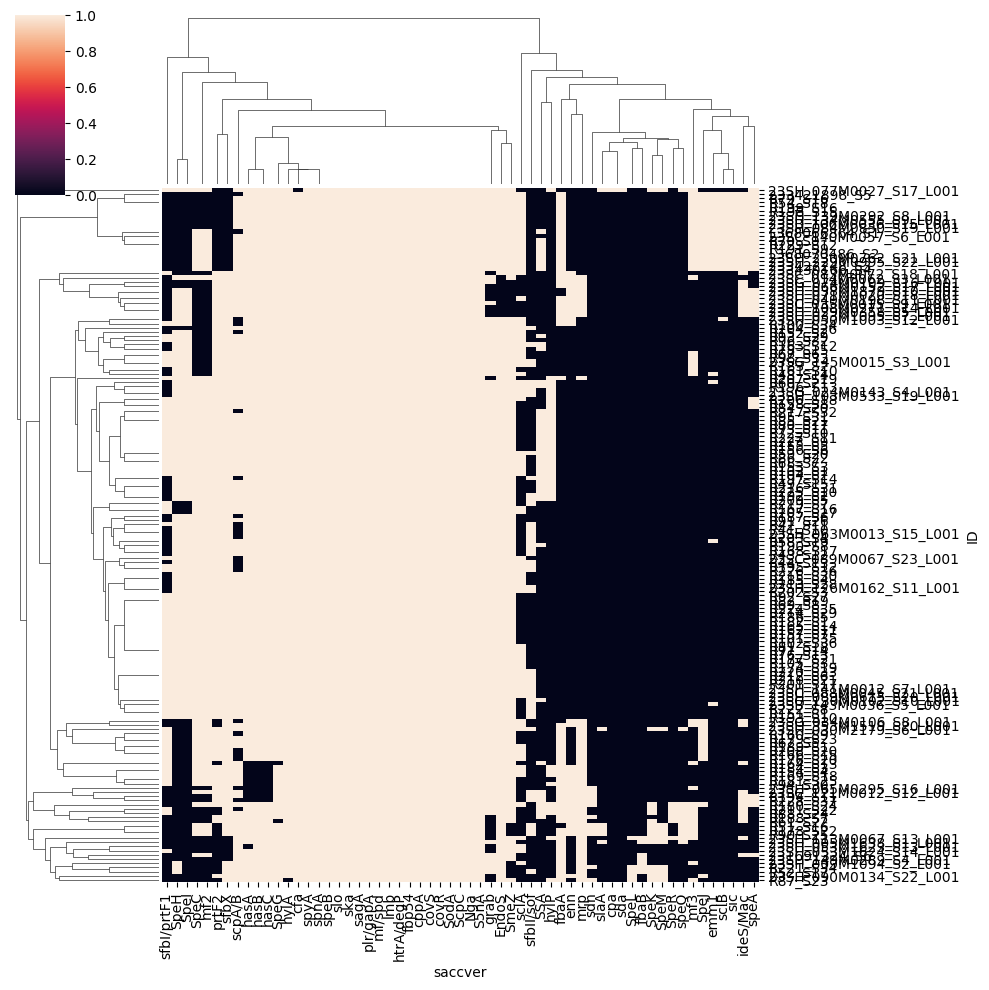

In [6]:
sns.clustermap(data = vf_hits_presence_absence_matrix, yticklabels=True, xticklabels=True)

### Generate alignments for CovS and CovR genes

In [7]:
covr = vf_hits[vf_hits['saccver'] == 'covR']
covs = vf_hits[vf_hits['saccver'] == 'covS']

def extract_genes(hits): 
    genes_hits = []
    for _, hit in hits.iterrows():
        genes = Path(f"virulence_adhesion_factors/genes/{hit['ID']}.ffn")
        if not genes.exists():
            print(genes)
        # get gene
        seqs = SeqIO.parse(genes, 'fasta')
        for seq in seqs:
            if seq.id == hit['qaccver']:
                seq.id = hit['ID'] + " " + seq.id 
                genes_hits.append(seq)
    return genes_hits

covr_genes = extract_genes(covr)
covs_genes = extract_genes(covs)

with open('virulence_adhesion_factors/covR_covS_alignment/covR.fas', 'w') as fh:
    SeqIO.write(covr_genes, fh, 'fasta-2line')
    
with open('virulence_adhesion_factors/covR_covS_alignment/covS.fas', 'w') as fh:
    SeqIO.write(covs_genes, fh, 'fasta-2line')